<a href="https://colab.research.google.com/github/jeremysiji/SCDV-FlightDelay/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Data

In [2]:
!gdown --id 1zQeXiTV0I2IOKqfiIMz-ntD17dXtb3af -O Airline_Delay_Causes.csvl

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zQeXiTV0I2IOKqfiIMz-ntD17dXtb3af
To: /content/Airline_Delay_Causes.csv
100% 23.5M/23.5M [00:00<00:00, 75.9MB/s]


In [3]:
dfm = pd.read_csv('/content/Airline_Delay_Causes.csv')

#Data Cleansing and Data Parsing

In [4]:
dfm.head()
dfm.shape

(140875, 21)

In [5]:
dfm.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [6]:
dfm['year'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018])

In [7]:
dfm['month'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [26]:
# Create a dictionary to store the carrier name and code mappings
carrier_mapping = {}

# Iterate through the DataFrame to populate the dictionary
for index, row in dfm.iterrows():
    carrier_name = row['carrier_name']
    carrier_code = row['carrier']
    carrier_mapping[carrier_name] = carrier_code  # Map carrier name to code

# Create a DataFrame from the dictionary
unique_carriers_df = pd.DataFrame(list(carrier_mapping.items()), columns=['Carrier Name', 'Carrier Code'])

# Display the DataFrame
print(unique_carriers_df)

                                 Carrier Name Carrier Code
0                                   Envoy Air           MQ
1                             Spirit Airlines           NK
2                           PSA Airlines Inc.           OH
3                       SkyWest Airlines Inc.           OO
4                           Piedmont Airlines           PT
5                                 Horizon Air           QX
6                    United Air Lines Network           UA
7                          Southwest Airlines           WN
8                          Mesa Airlines Inc.           YV
9                            Republic Airline           YX
10                          Endeavor Air Inc.           9E
11                  American Airlines Network           AA
12                    Alaska Airlines Network           AS
13                            JetBlue Airways           B6
14              CommuteAir LLC dba CommuteAir           C5
15                    Delta Air Lines Network           

In [31]:
dfm_afts = dfm[dfm['carrier'].isin(['WN', 'DL', 'B6', 'UA', 'AA'])]
dfm_afts.shape

(37230, 22)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,date
604,2024,12,UA,United Air Lines Network,ABQ,"Albuquerque, NM: Albuquerque International Sun...",107.0,20.0,11.17,0.00,...,6.59,1.0,0.0,1502.0,737.0,0.0,79.0,0.0,686.0,2024-12-01
605,2024,12,UA,United Air Lines Network,ALB,"Albany, NY: Albany International",31.0,12.0,3.39,1.00,...,3.91,0.0,0.0,491.0,94.0,100.0,160.0,0.0,137.0,2024-12-01
606,2024,12,UA,United Air Lines Network,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",45.0,3.0,1.47,0.00,...,1.07,0.0,0.0,228.0,50.0,0.0,75.0,0.0,103.0,2024-12-01
607,2024,12,UA,United Air Lines Network,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",531.0,104.0,36.79,1.87,...,33.04,4.0,1.0,5019.0,1635.0,219.0,1216.0,0.0,1949.0,2024-12-01
608,2024,12,UA,United Air Lines Network,AUS,"Austin, TX: Austin - Bergstrom International",723.0,143.0,50.52,3.85,...,49.60,2.0,0.0,9271.0,3312.0,376.0,1307.0,0.0,4276.0,2024-12-01


#Data Exploration and Data Parsing

In [ ]:
# prompt: a slider using jupyter widgets

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Calculate unique_airports_count here
unique_airports_count = data_24['airport'].unique()  # Assuming you want unique airports, not carriers

# Create a slider widget
slider = widgets.IntSlider(
    value=10,
    min=1,
    max=len(unique_airports_count),
    step=1,
    description='Top N Airports:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Function to update the plot based on the slider value
def update_plot(change):
    n_airports = change.new
    airport_cancelled = data_24.groupby('airport')['arr_del15'].sum().sort_values(ascending=False).head(n_airports)

    plt.figure(figsize=(10, 6))
    plt.bar(airport_cancelled.index, airport_cancelled.values)
    plt.xlabel('Airport Name')
    plt.ylabel('Total Cancelled Arrivals')
    plt.title(f'Top {n_airports} Airports with Most Cancelled Arrivals')
    plt.xticks(rotation=50, ha='right')
    plt.tight_layout()
    plt.show()


# Observe the slider for changes and call the update_plot function
slider.observe(update_plot, names='value')

# Display the slider
display(slider)

IntSlider(value=10, continuous_update=False, description='Top N Airports:', max=388, min=1)

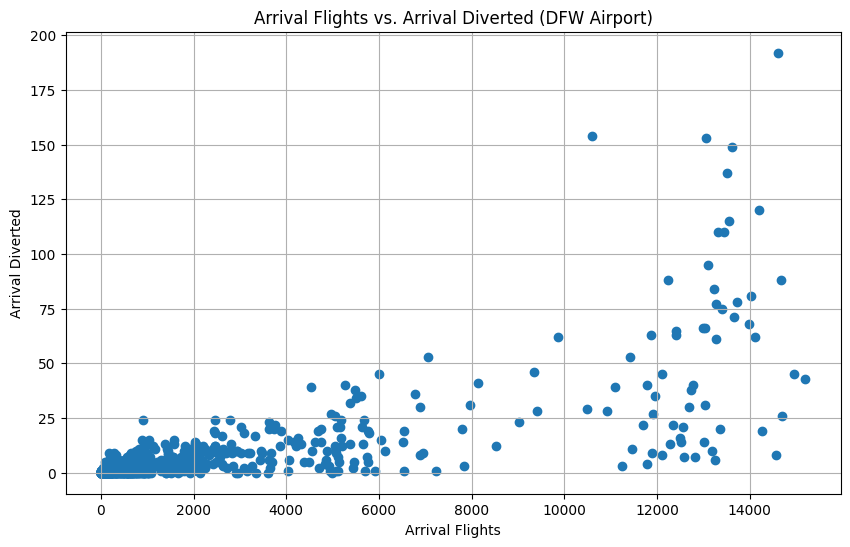

In [ ]:
# prompt: Give me a code to filter on dfw airport and generate a scatter plot with the the arrival flights  and the arr_diverted

import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_24 is your DataFrame and is already loaded
# ... (your existing code to load the data)

# Filter for dfw airport
dfw_data = data_24[data_24['airport'] == 'DFW']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dfw_data['arr_flights'], dfw_data['arr_diverted'])
plt.xlabel('Arrival Flights')
plt.ylabel('Arrival Diverted')
plt.title('Arrival Flights vs. Arrival Diverted (DFW Airport)')
plt.grid(True)
plt.show()


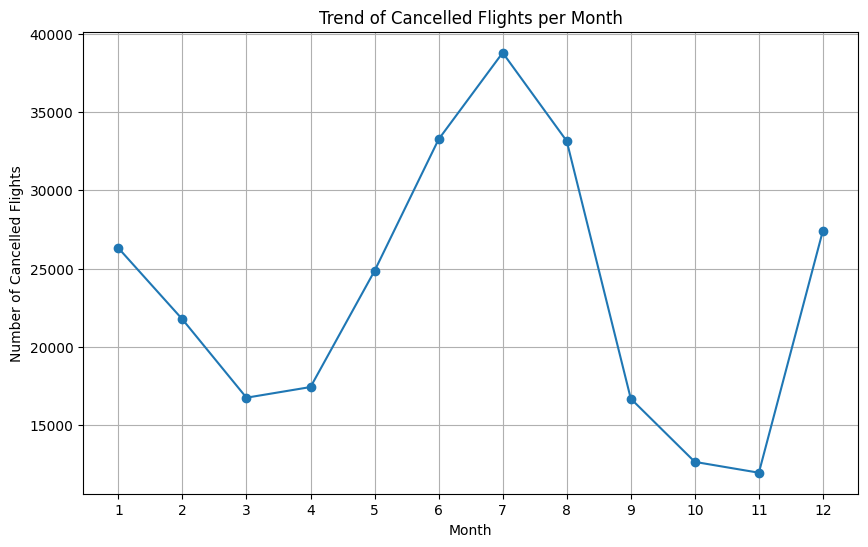

In [ ]:
# prompt: Give me a lineplot code to plot the canceled flights with the month to see the trend

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Month' column exists and 'Cancelled' column represents cancelled flights
# Replace 'Cancelled' with the actual column name if different

monthly_cancellations = data_24.groupby('month')['weather_ct'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month')
plt.grid(True)
# Set x-axis ticks to be from 1 to 12
plt.xticks(range(1, 13))
plt.show()
plt.show()



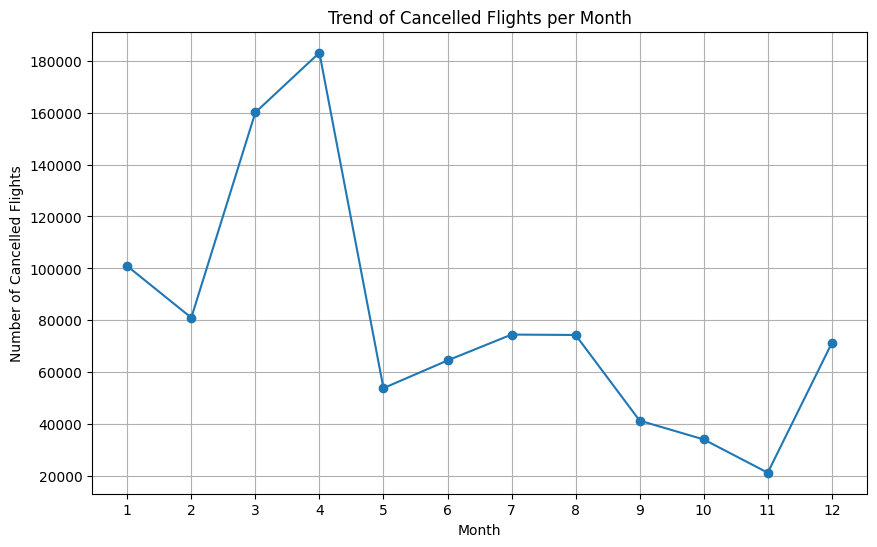

In [ ]:
# prompt: Give me a lineplot code to plot the canceled flights with the month to see the trend

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Month' column exists and 'Cancelled' column represents cancelled flights
# Replace 'Cancelled' with the actual column name if different


monthly_cancellations = data_24.groupby('month')['arr_cancelled'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

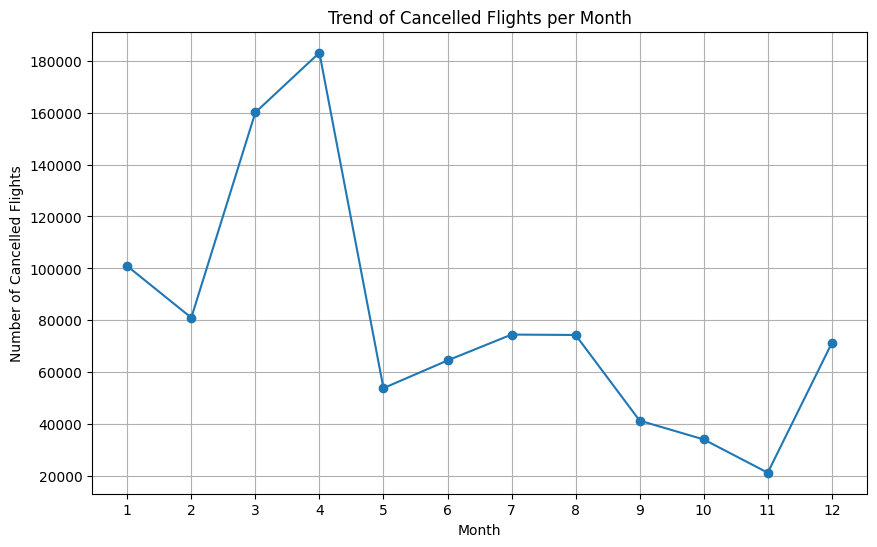

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'month' and sum 'arr_cancelled'
monthly_cancellations = data_24.groupby('month')['arr_cancelled'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month')
plt.grid(True)

# Set x-axis ticks to be from 1 to 12
plt.xticks(range(1, 13))

plt.show()

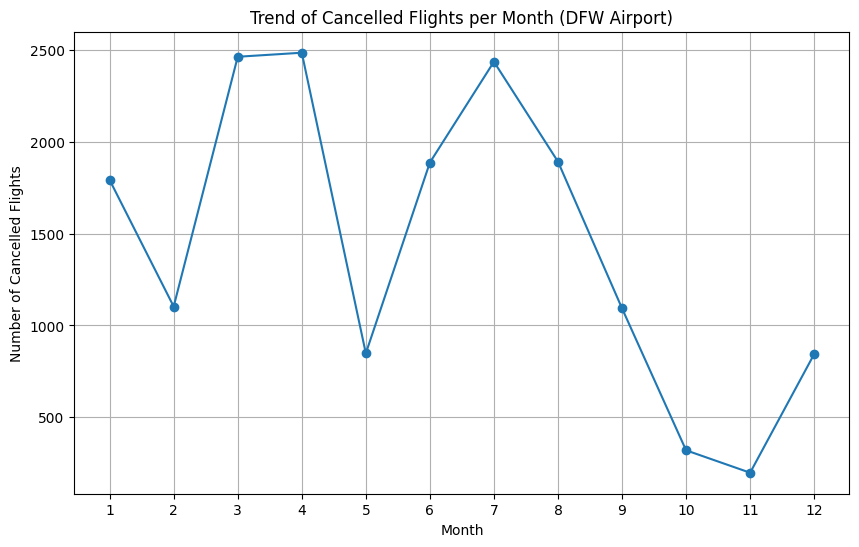

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for DFW airport
dfw_data = data_24[data_24['airport'] == 'JFK']

# Group by 'month' and sum 'arr_cancelled' for DFW
monthly_cancellations_dfw = dfw_data.groupby('month')['arr_cancelled'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations_dfw.index, monthly_cancellations_dfw.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month (DFW Airport)')
plt.grid(True)

# Set x-axis ticks to be from 1 to 12
plt.xticks(range(1, 13))

plt.show()

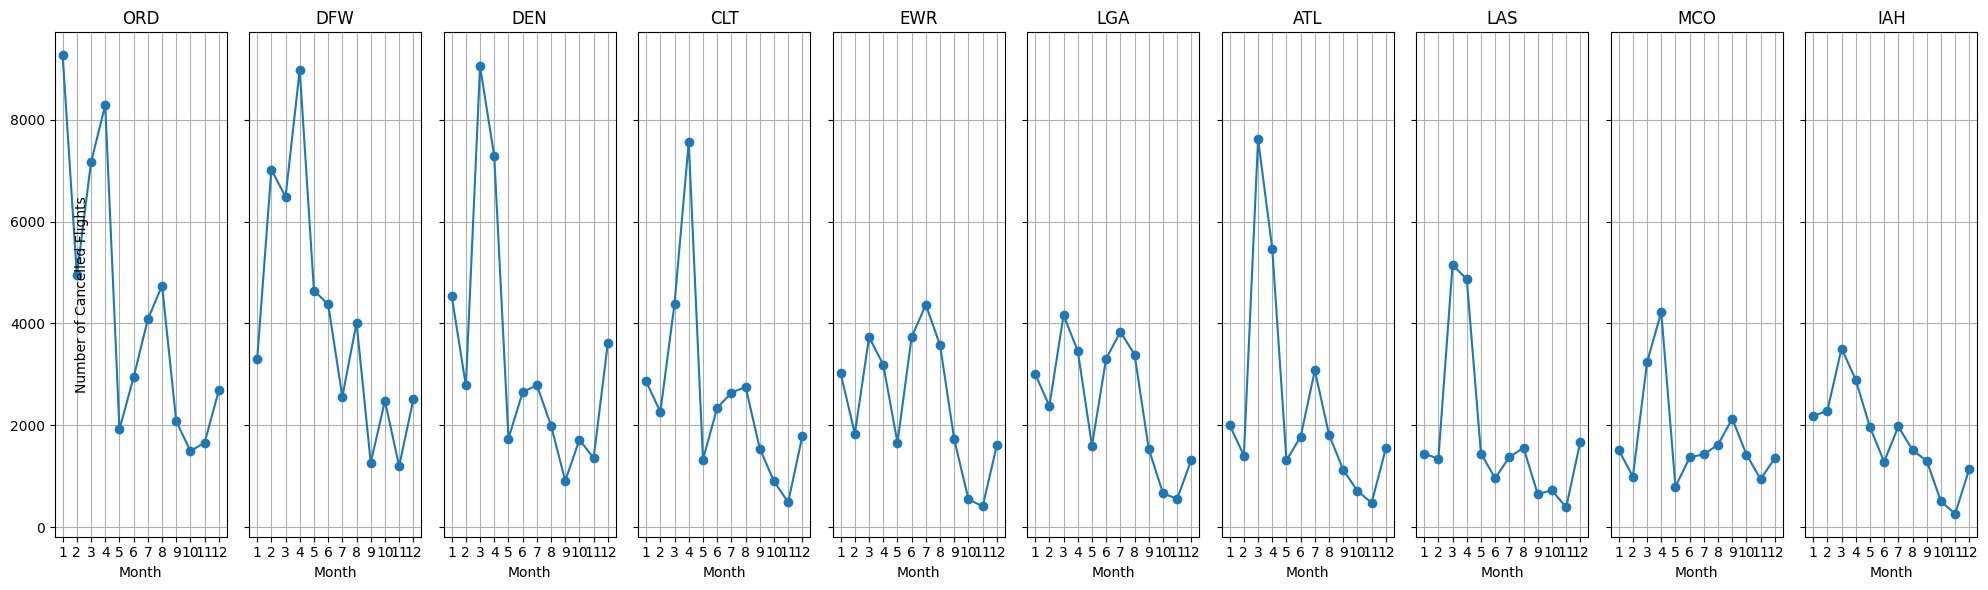

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 worst airports
worst_airports = data_24.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(10).index

# Create subplots
fig, axes = plt.subplots(1, 10, figsize=(20, 6), sharey=True)  # 1 row, 10 columns

# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = data_24[data_24['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Set common y-axis label
fig.text(0.04, 0.5, 'Number of Cancelled Flights', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

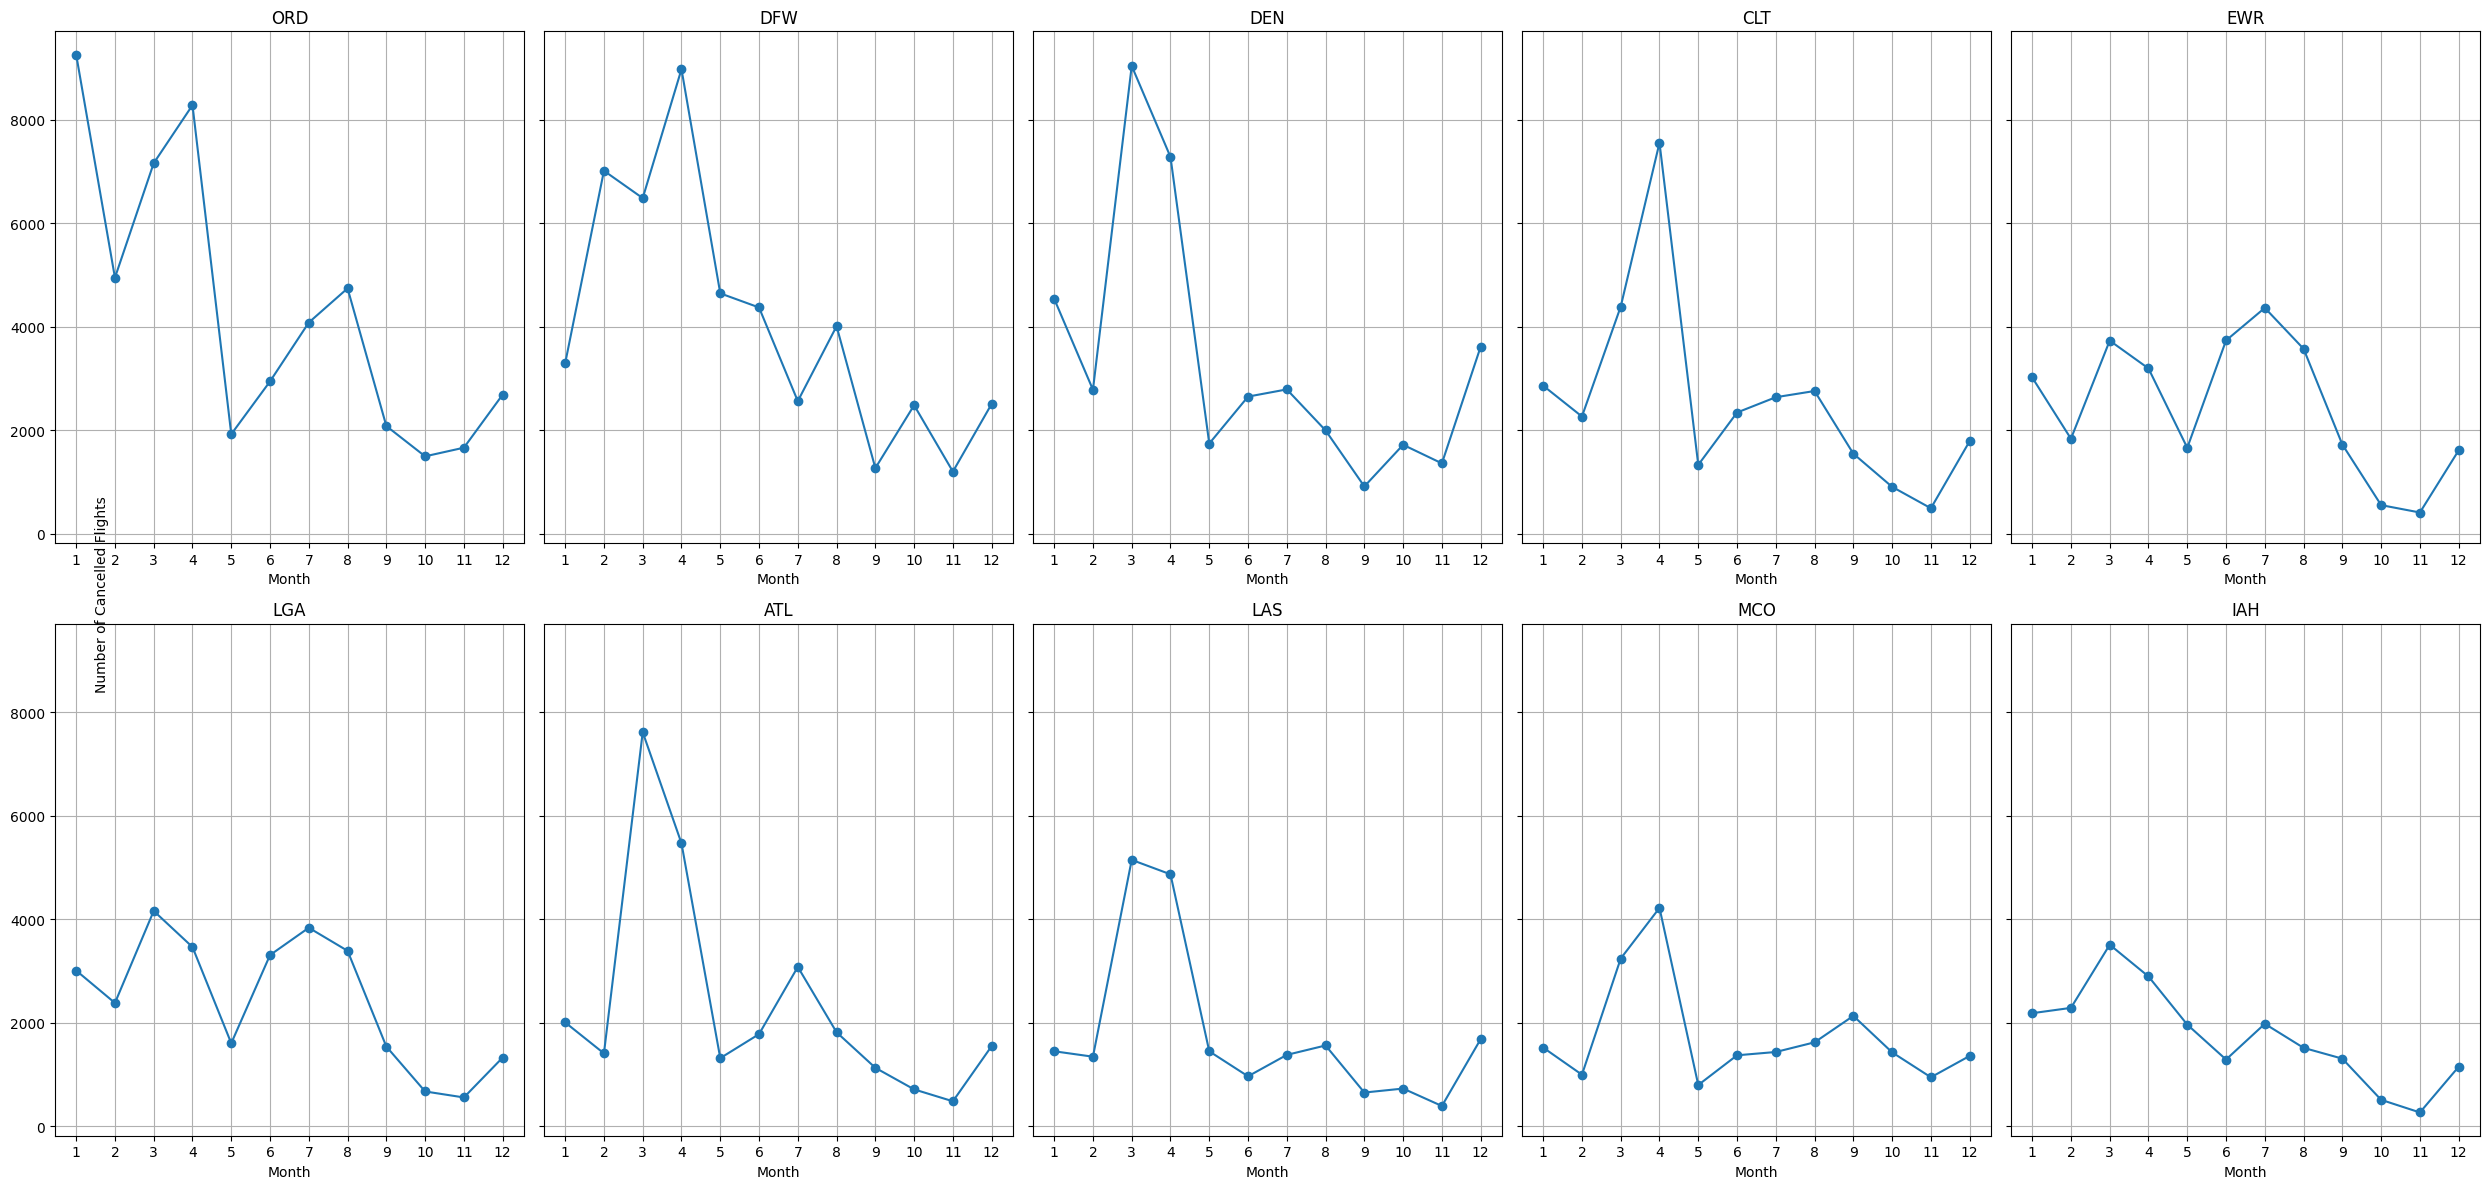

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 worst airports
worst_airports = data_24.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(10).index

# Create subplots with increased width
fig, axes = plt.subplots(2, 5, figsize=(25, 12), sharey=True)  # 2 rows, 5 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()


# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = data_24[data_24['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Set common y-axis label
fig.text(0.04, 0.5, 'Number of Cancelled Flights', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

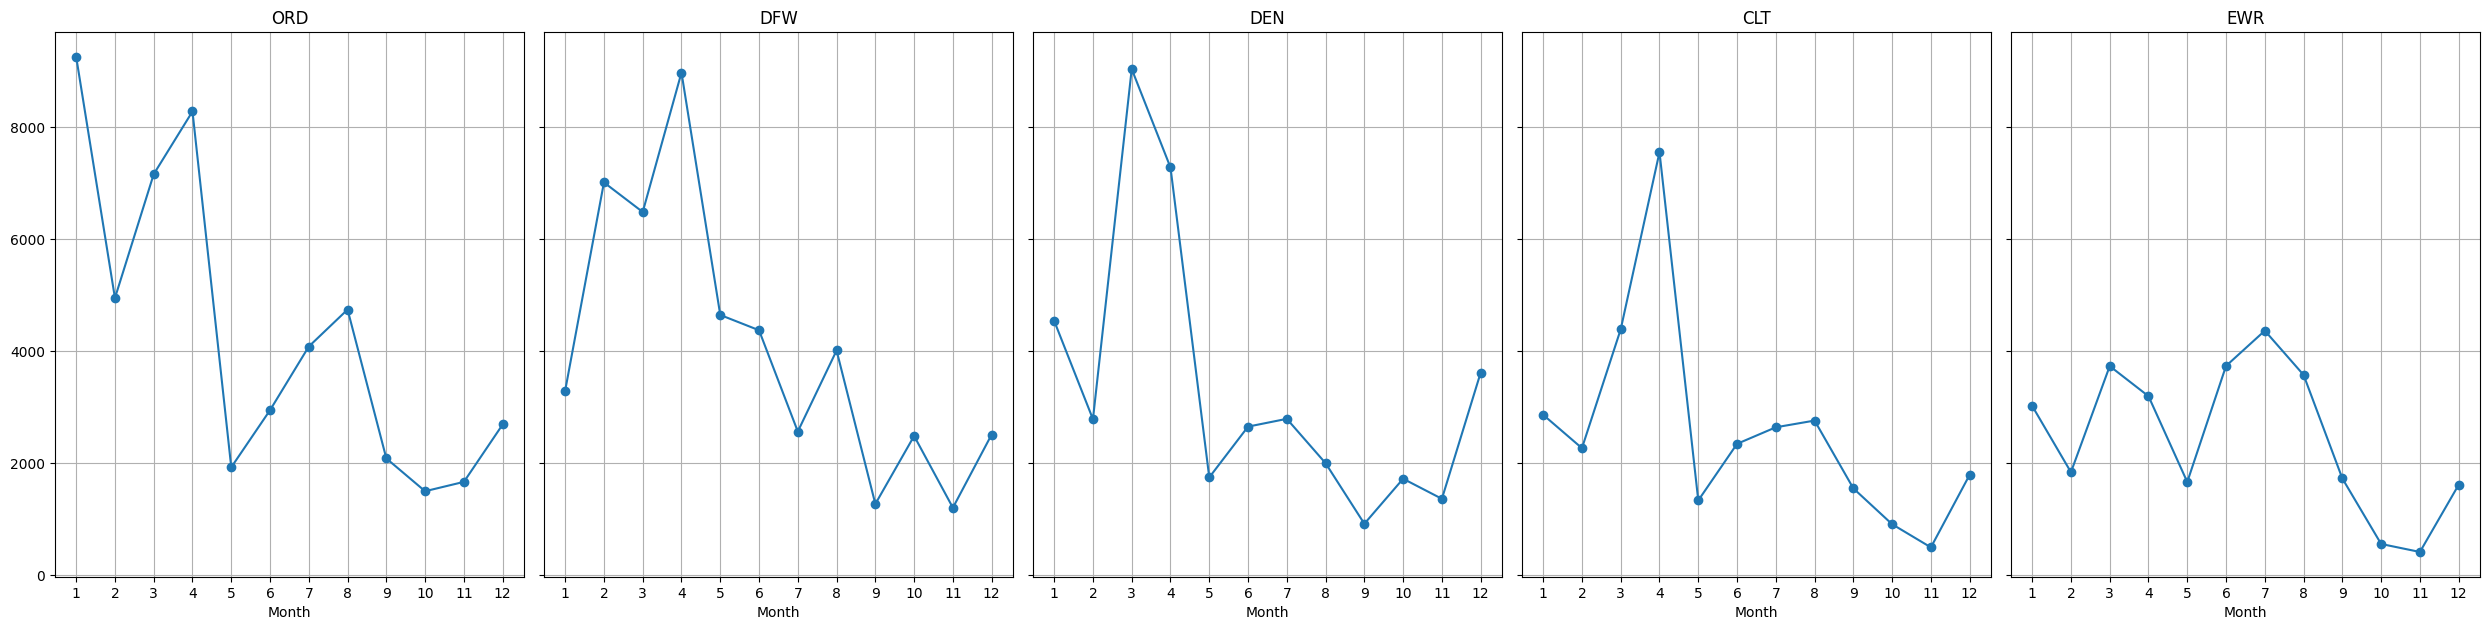

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 worst airports
worst_airports = data_24.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(5).index

num_rows = 2  # Number of rows in the subplot grid
num_cols = 5   # Number of columns in the subplot grid
num_plots = len(worst_airports)  # Total number of plots needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 12), sharey=True)

axes = axes.flatten()  # Flatten the axes array

# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = data_24[data_24['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Hide any empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

# Set common y-axis label
#fig.text(0,'Number of Cancelled Flights', va='center', rotation='vertical')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

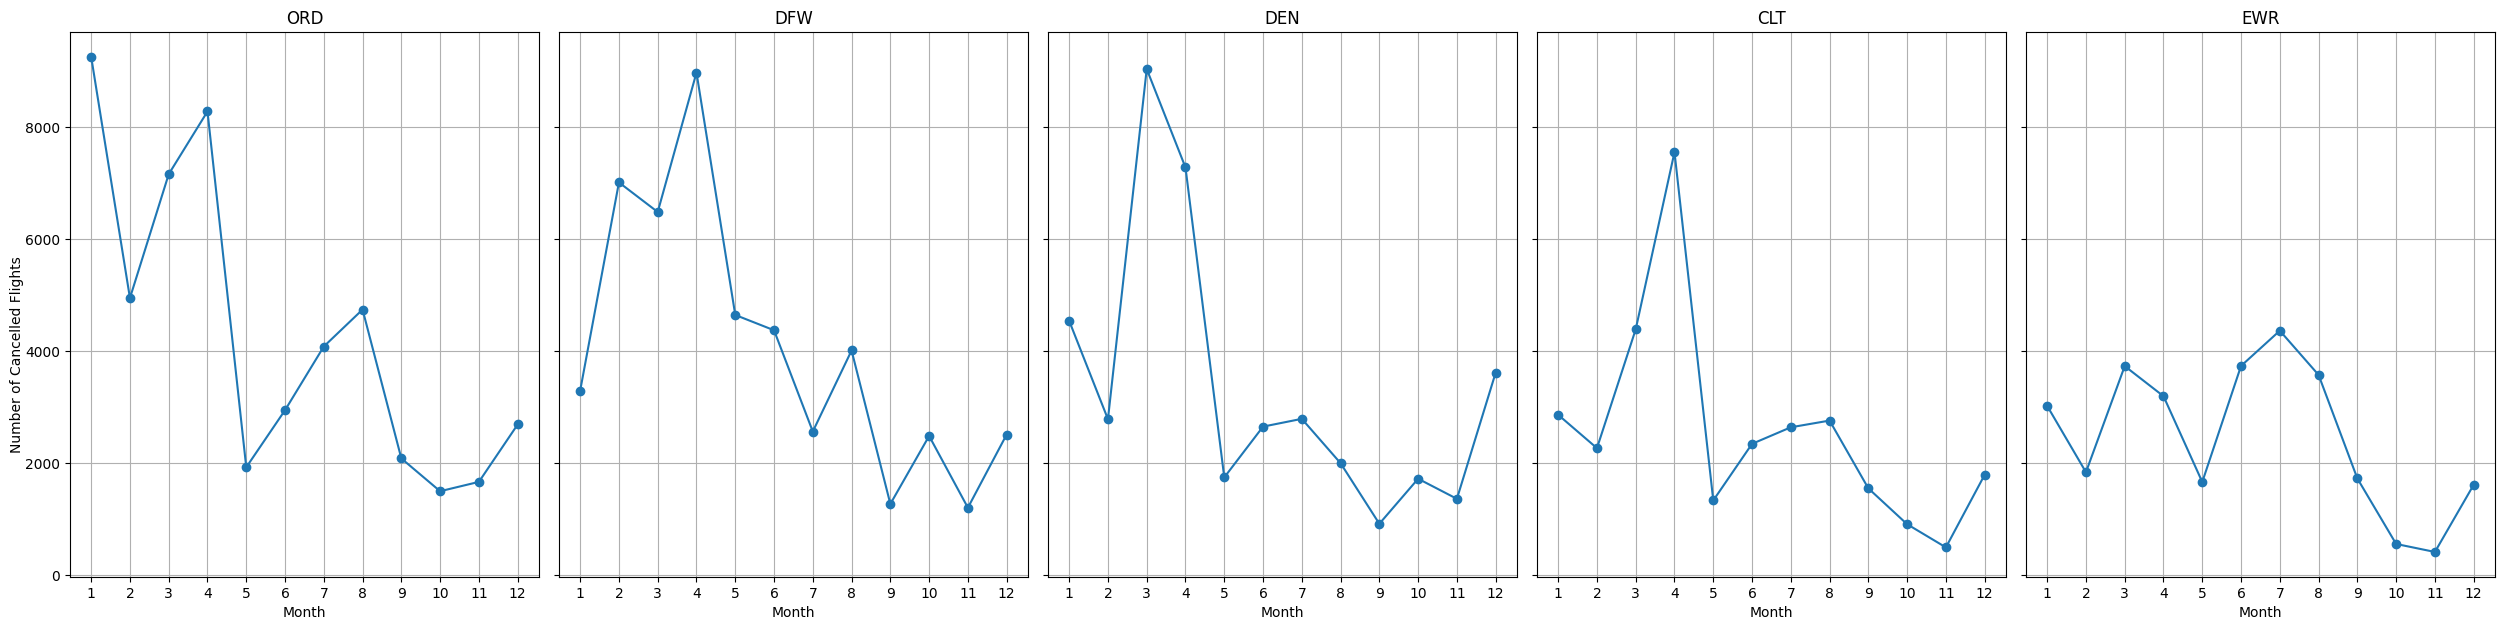

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 5 worst airports
worst_airports = data_24.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(5).index

num_rows = 2  # Number of rows in the subplot grid
num_cols = 5  # Number of columns in the subplot grid
num_plots = len(worst_airports)  # Total number of plots needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 12), sharey=True)

axes = axes.flatten()  # Flatten the axes array

# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = data_24[data_24['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Hide any empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

# Set common y-axis label
fig.text(0, 0.7,'Number of Cancelled Flights', va='center', rotation='vertical') # Updated y-axis label placement

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

<ipython-input-16-e15aefb53a5e>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='arr_delay', data=dfm_2024, ci=None) # ci=None removes confidence intervals


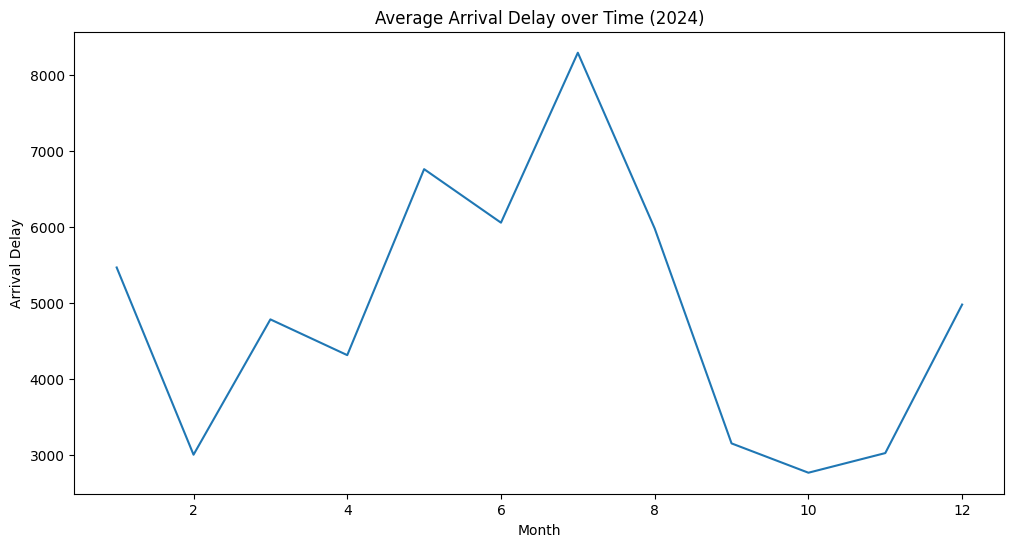

In [16]:
# prompt: EDA: Plot arr_delay over time, by carrier, and by airport. I want it to be a smooth line plot AND THE DATA FRAME IS DFM filter it to just 2024

import matplotlib.pyplot as plt
# Filter data for 2024
dfm_2024 = dfm[dfm['year'] == 2024]

# Smooth line plot of arr_delay over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='arr_delay', data=dfm_2024, ci=None) # ci=None removes confidence intervals
plt.title('Average Arrival Delay over Time (2024)')
plt.xlabel('Month')
plt.ylabel('Arrival Delay')
plt.show()

#Statistical Analysis

#Machine Learning

In [19]:
dfm['date'] = pd.to_datetime(dfm['year'].astype(str) + '-' + dfm['month'].astype(str))
dfm = dfm[(dfm['date'] >= '2018-12-01') & (dfm['date'] <= '2024-12-31')]

# Check structure
print(dfm.head())
print(dfm.isnull().sum())

   year  month carrier carrier_name airport  \
0  2024     12      MQ    Envoy Air     EVV   
1  2024     12      MQ    Envoy Air     EWR   
2  2024     12      MQ    Envoy Air     EYW   
3  2024     12      MQ    Envoy Air     FAR   
4  2024     12      MQ    Envoy Air     FSD   

                               airport_name  arr_flights  arr_del15  \
0       Evansville, IN: Evansville Regional         61.0        9.0   
1  Newark, NJ: Newark Liberty International        107.0       42.0   
2      Key West, FL: Key West International        169.0       31.0   
3           Fargo, ND: Hector International        171.0       35.0   
4           Sioux Falls, SD: Joe Foss Field         69.0       14.0   

   carrier_ct  weather_ct  ...  late_aircraft_ct  arr_cancelled  arr_diverted  \
0        1.52        1.08  ...              5.84            0.0           0.0   
1        6.01        5.89  ...              4.94            0.0           0.0   
2        3.37        0.71  ...             15.4

<ipython-input-35-9b203f23f0dd>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='arr_del15', hue='carrier', data=dfm_afts, ci=None)  # Add hue='carrier' for legend


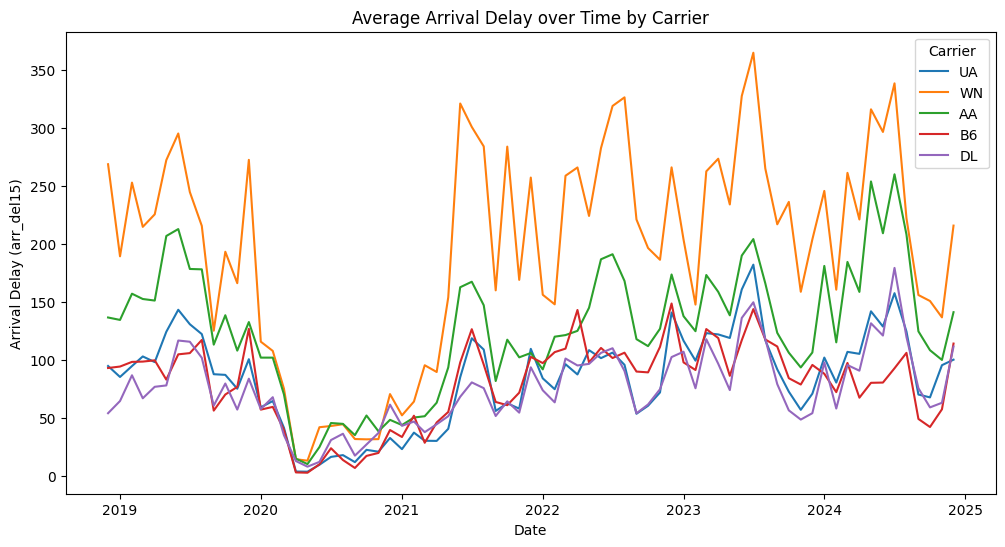

In [35]:
# prompt: EDA: Plot arr_delay over time, by carrier, and by airport. I want it to be a smooth line plot AND THE DATA FRAME IS DFM filter it to just 2024

import matplotlib.pyplot as plt
# Filter data for 2024

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='arr_del15', hue='carrier', data=dfm_afts, ci=None)  # Add hue='carrier' for legend
plt.title('Average Arrival Delay over Time by Carrier')
plt.xlabel('Date')
plt.ylabel('Arrival Delay (arr_del15)')
plt.legend(title='Carrier')  # Add legend with title
plt.show()

<ipython-input-36-e8aab07bd57f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='arr_del15', data=dfm_afts, ci=None)  # Add hue='carrier' for legend
<ipython-input-36-e8aab07bd57f>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Carrier')  # Add legend with title


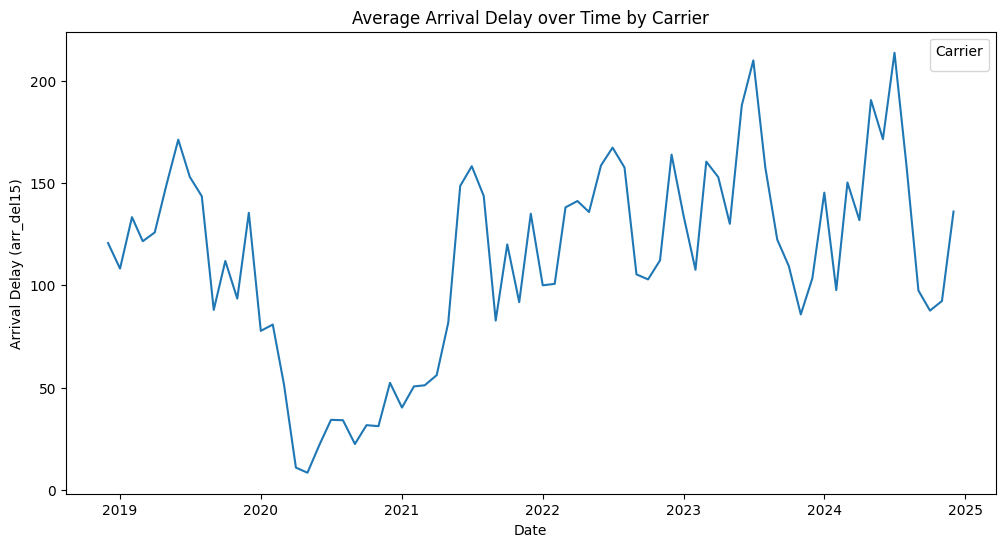

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='arr_del15', data=dfm_afts, ci=None)  # Add hue='carrier' for legend
plt.title('Average Arrival Delay over Time by Carrier')
plt.xlabel('Date')
plt.ylabel('Arrival Delay (arr_del15)')
plt.legend(title='Carrier')  # Add legend with title
plt.show()

<ipython-input-37-4b44348150cf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='weather_ct', hue='carrier', data=dfm_afts, ci=None)  # Add hue='carrier' for legend


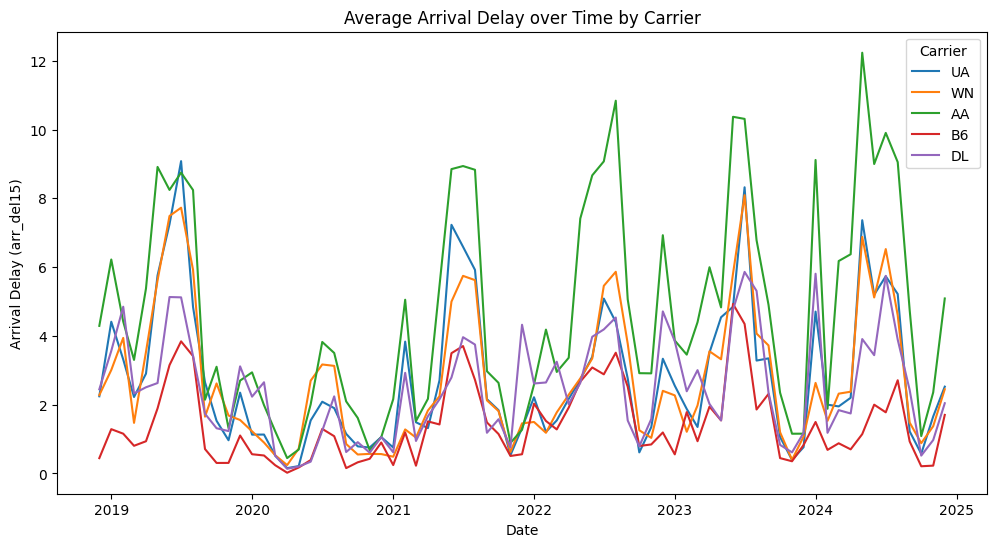

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='weather_ct', hue='carrier', data=dfm_afts, ci=None)  # Add hue='carrier' for legend
plt.title('Average Arrival Delay over Time by Carrier')
plt.xlabel('Date')
plt.ylabel('Arrival Delay (arr_del15)')
plt.legend(title='Carrier')  # Add legend with title
plt.show()